# Face Pose DLIB

This is based on the post by Satya Mallick
https://www.learnopencv.com/head-pose-estimation-using-opencv-and-dlib/

In [1]:
%load_ext autoreload
%autoreload 2

# put system imports here
import os
import sys
from os.path import join
from glob import glob
from pathlib import Path
import random

# put pip/conda installed imports here
import numpy as np
import pandas as pd
import cv2 as cv
import matplotlib.pyplot as plt

# put local imports here
fp_app_root = join(Path(os.getcwd()).parent)
sys.path.append(fp_app_root)
from app.settings import app_cfg
from app.utils import file_utils, draw_utils, im_utils, detect_utils
from app.models.bbox import BBoxNorm

## Load image

In [2]:
filepaths = glob(join(app_cfg.DIR_IMAGES, '*.jpg'))
fp_im = filepaths[random.randint(0, len(filepaths)-1)]
im_bgr = cv.imread(fp_im)

In [5]:
# Copied from https://www.learnopencv.com/head-pose-estimation-using-opencv-and-dlib/
def get_pose(img, pose_points):
  size = img.shape
  # Camera internals
  focal_length = size[1]
  center = (size[1]/2, size[0]/2)
  camera_matrix = np.array(
      [[focal_length, 0, center[0]],
      [0, focal_length, center[1]],
      [0, 1, 1]], dtype = "double"
  )

  dist_coeffs = np.zeros((4,1)) # Assuming no lens distortion
  (success, rot_vec, tran_vec) = cv2.solvePnP(
  model_points, pose_points, 
  camera_matrix, dist_coeffs, 
  flags=cv2.SOLVEPNP_ITERATIVE)

  print("Rotation Vector:\n {0}".format(rot_vec))
  print("Translation Vector:\n {0}".format(tran_vec))

  # Project a 3D point (0, 0, 1000.0) onto the image plane.
  # We use this to draw a line sticking out of the nose
  return (success, rot_vec, tran_vec,camera_matrix)

In [8]:
regions = {
  "outside_mouth": {
      "points": list(range(49, 60+1)),
      "closed": True
      },
  "inside_mouth": {
      "points": list(range(61, 68)),
      "closed": True
      },
  "brow_left": {
      "points": list(range(18, 22+1)),
      "closed": False
      },
  "brow_right": {
      "points": list(range(23, 27+1)),
      "closed": False
      },
  "eye_right": {
      "points": list(range(37, 42+1)),
      "closed": True
      },
  "eye_left": {
      "points": list(range(43, 48+1)),
      "closed": True
      },
  "nose_bottom": {
      "points": list(range(31,36+1)),
      "closed": True
      },
  "nose_bridge": {
      "points": list(range(28,31+1)),
      "closed": False
      },
  "jaw": {
      "points": list(range(1, 17+1)),
      "closed": False
  }
}

## Dlib Predictor

In [13]:
detector_dlib = detect_utils.FaceDetectorDLIB()

In [35]:
bboxes_norm = detector_dlib.detect(im_bgr,pyramids=2)

In [48]:
print(f'{len(bboxes_norm)} face(s) detected')
print(bboxes_norm)

1 face(s) detected
[BBoxNorm(x1=0.4109090909090909, y1=0.21391752577319587, x2=0.5272727272727272, y2=0.38144329896907214)]


In [49]:
landmarks = detector_dlib.landmarks(im_bgr, bboxes_norm[0])

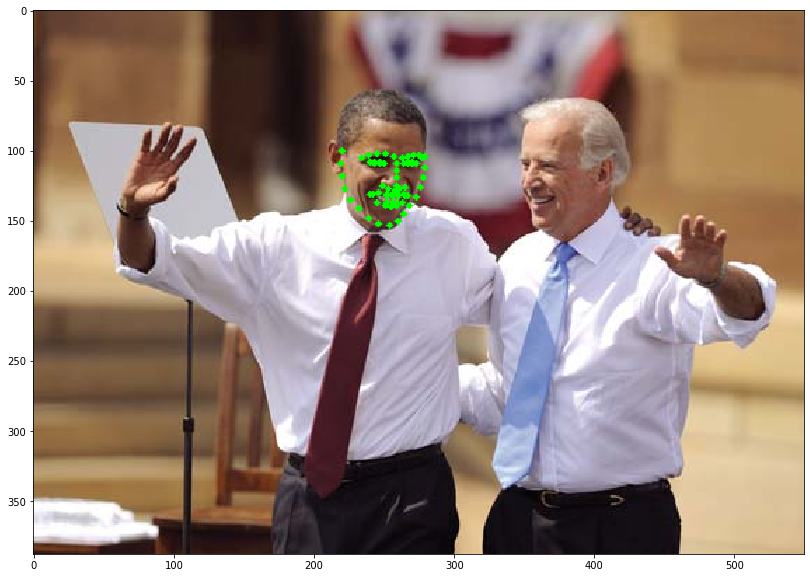

In [50]:
# Draw landmarks as dots
im_dst = im_bgr.copy()
for lm in landmarks:
    cv.circle(im_dst,(lm[0],lm[1]), 2, (0,255,0), -1, cv.LINE_AA)

plt.figure(figsize=(16,10))
plt.imshow(im_utils.bgr2rgb(im_dst))

In [52]:
# save result
#cv.imwrite('face_workshop.jpg', im_dst)

True